<a href="https://colab.research.google.com/github/ashu433/shala2020.github.io/blob/master/Data_Science_Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
from math import pi

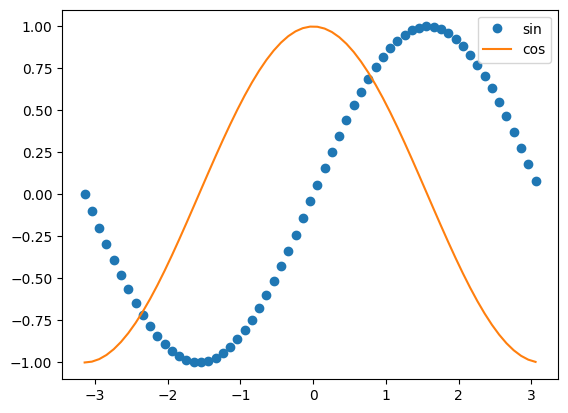

In [2]:
# Refer to the official documentation of packages
x = np.arange(-pi, pi, 0.1)
y = np.sin(x)
plt.plot(x, y, 'o') # we can also try go/bo/ro/r- etc for changing the representation of the points (marker)
plt.plot(x,np.cos(x))
plt.legend(['sin', 'cos'])
plt.show()

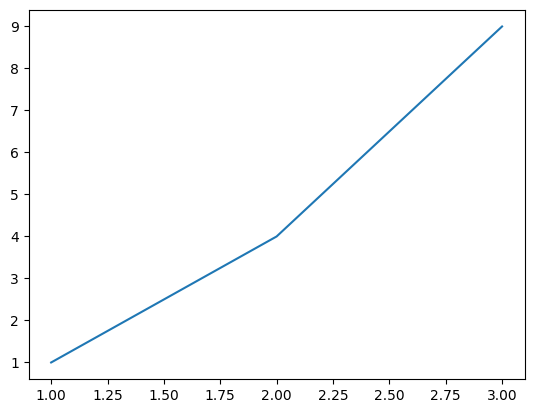

In [3]:
x = [1, 2, 3]
y = [1, 4, 9]
z = [10, 5, 0]
plt.plot(x, y)
# plt.plot(x, z)
# plt.title("test plot")
# plt.xlabel("x")
# plt.ylabel("y and z")
# plt.legend(["this is y", "this is z"])
plt.show()

In [4]:
sample_data = pd.read_csv('sample_data.csv')

In [5]:
sample_data

,column_a,column_b,column_c
0,1,1,10
1,2,4,8
2,3,9,6
3,4,16,4
4,5,25,2


In [6]:
#Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure
type(sample_data)

pandas.core.frame.DataFrame

In [7]:
# type(sample_data['column_c'])
type(sample_data.column_c)

pandas.core.series.Series

In [8]:
# extracting first element of the series
sample_data.column_c.iloc[0]

10

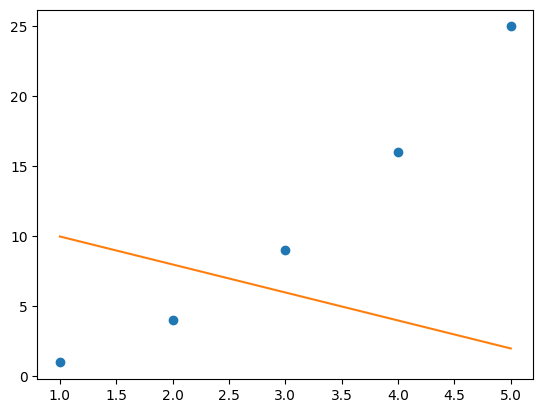

In [9]:
plt.plot(sample_data.column_a, sample_data.column_b, 'o')
plt.plot(sample_data.column_a, sample_data.column_c)
# Add titles and legend as described earlier
# plt.legend(["col_B", "col_C"])
plt.show()

In [10]:
data = pd.read_csv('countries.csv')

In [11]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
data
# You can refer to the World Bank data for latest population (https://data.worldbank.org/).

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [12]:
data[data.country == 'United States']

,country,year,population
1608,United States,1952,157553000
1609,United States,1957,171984000
1610,United States,1962,186538000
1611,United States,1967,198712000
1612,United States,1972,209896000
1613,United States,1977,220239000
1614,United States,1982,232187835
1615,United States,1987,242803533
1616,United States,1992,256894189
1617,United States,1997,272911760


In [13]:
us = data[data.country == 'United States']

In [15]:
china = data[data.country == 'China']
china

,country,year,population
288,China,1952,556263527
289,China,1957,637408000
290,China,1962,665770000
291,China,1967,754550000
292,China,1972,862030000
293,China,1977,943455000
294,China,1982,1000281000
295,China,1987,1084035000
296,China,1992,1164970000
297,China,1997,1230075000


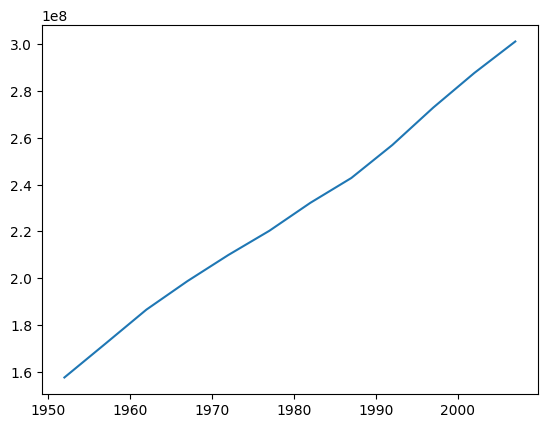

In [16]:
plt.plot(us.year, us.population)
# Observe the 1e8 on the Y-axis

# plt.plot(us.year, us.population / 10**6)
# plt.plot(china.year, china.population / 10**6)
# plt.legend(['United States', 'China'])
# plt.xlabel('year')
# plt.ylabel('population in million')
plt.show()
# Observe the population growth

In [17]:
us.population

1608    157553000
1609    171984000
1610    186538000
1611    198712000
1612    209896000
1613    220239000
1614    232187835
1615    242803533
1616    256894189
1617    272911760
1618    287675526
1619    301139947
Name: population, dtype: int64

In [18]:
us.population / us.population.iloc[0] * 100

1608    100.000000
1609    109.159457
1610    118.396984
1611    126.123908
1612    133.222471
1613    139.787246
1614    147.371256
1615    154.109114
1616    163.052553
1617    173.219018
1618    182.589685
1619    191.135648
Name: population, dtype: float64

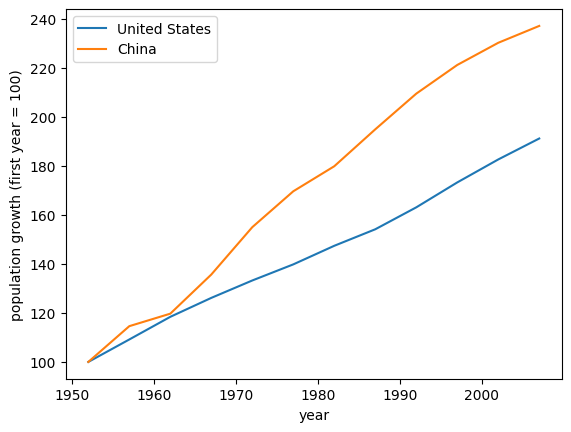

In [19]:
plt.plot(us.year, us.population / us.population.iloc[0] * 100)
plt.plot(china.year, china.population / china.population.iloc[0] * 100)
plt.legend(['United States', 'China'])
plt.xlabel('year')
plt.ylabel('population growth (first year = 100)')
plt.show()

In [20]:
movies = pd.read_csv('moviesData.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [21]:
movies.head()

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover


In [22]:
movies.shape

(600, 31)

(array([  2.,  35., 329., 179.,  40.,   8.,   4.,   1.,   0.,   1.]),
 array([ 39. ,  61.8,  84.6, 107.4, 130.2, 153. , 175.8, 198.6, 221.4,
        244.2, 267. ]),
 <BarContainer object of 10 artists>)

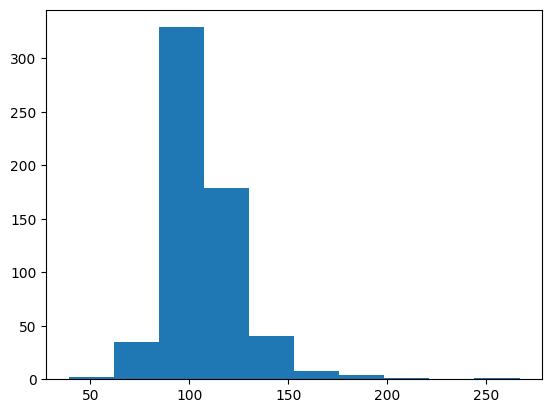

In [23]:
# Plot a histogram of the object named runtime in movies.
# A histogram is a visual representation of the distribution of a dataset.
# It is used to plot the frequency of score occurrences in a continuous dataset.
# Observe the warning in the output
# Slide 9
plt.hist(movies.runtime)

In [24]:
movies.runtime.describe()
# observe that the count of runtime is one less than 600

count    599.000000
mean     105.884808
std       19.542042
min       39.000000
25%       93.000000
50%      102.000000
75%      115.000000
max      267.000000
Name: runtime, dtype: float64

In [25]:
print(movies.runtime.isna().sum())

1


In [26]:
movies = movies.dropna() # Drop the na datapoints
movies.shape
# One can also impute the values
# Assignment

(572, 31)

In [27]:
print(movies.runtime.isna().sum())

0


(0.0, 300.0)

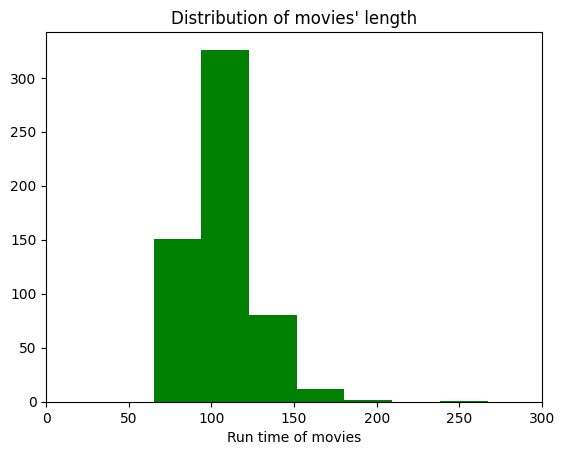

In [28]:
plt.hist(movies.runtime, bins = 7, color='green', orientation='vertical')
# In the histogram there are 7 bins.
# Height of a bin represents the number of observations lying in that interval.
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html
plt.title("Distribution of movies' length")
plt.xlabel("Run time of movies")
plt.xlim(0,300)

In [29]:
movies.head()

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover


In [30]:
# create a pie chart from the object genre in the movies data frame.
# A pie chart is a circular chart
# It is Divided into wedge-like sectors, illustrating proportion.
# The total value of the pie is always 100 percent.
# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
# Type of genre_counts
genre_counts = movies.genre.value_counts()
print(genre_counts)

Drama                        298
Comedy                        86
Action & Adventure            62
Mystery & Suspense            56
Documentary                   40
Horror                        22
Science Fiction & Fantasy      8
Name: genre, dtype: int64


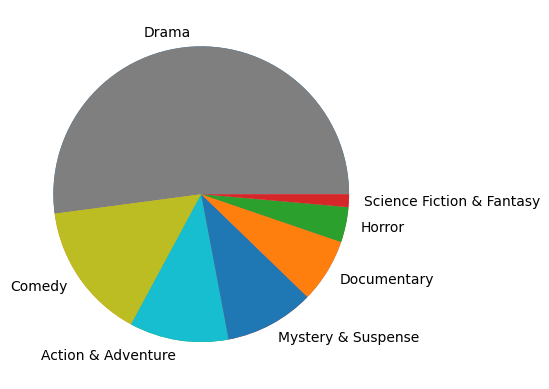

In [32]:
plt.pie(genre_counts)
# plt.pie(genre_counts, labels=genre_counts)
plt.pie(genre_counts, labels=genre_counts.index.tolist())
plt.show()
# Change the label of the pie chart

In [33]:
movies.head()

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover


In [34]:
moviesSub = movies[0:10]
moviesSub.shape

(10, 31)

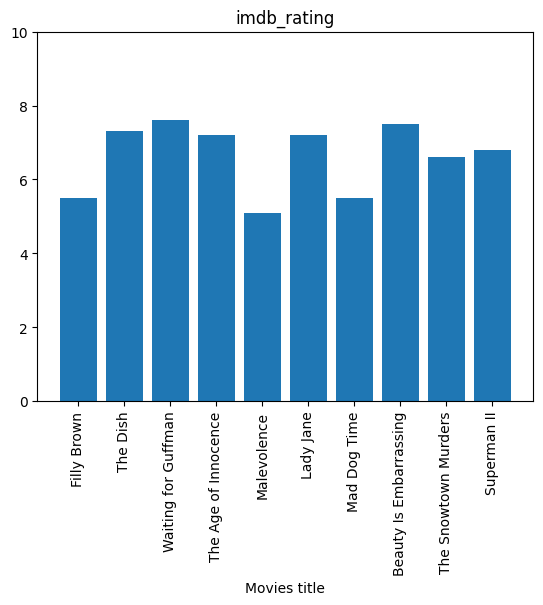

In [36]:
#  draw a bar chart of the object named imdb underscore rating in movies.
# A bar chart represents data in rectangular bars with length of the bar proportional to the value of the variable.
plt.bar(moviesSub.title, moviesSub.imdb_rating)
plt.xlabel('Movies title')
plt.title('imdb_rating')
plt.xticks(rotation='vertical')
plt.ylim(0,10)
plt.show()

<ipython-input-37-868836d0fb91>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies.corr())


<Axes: >

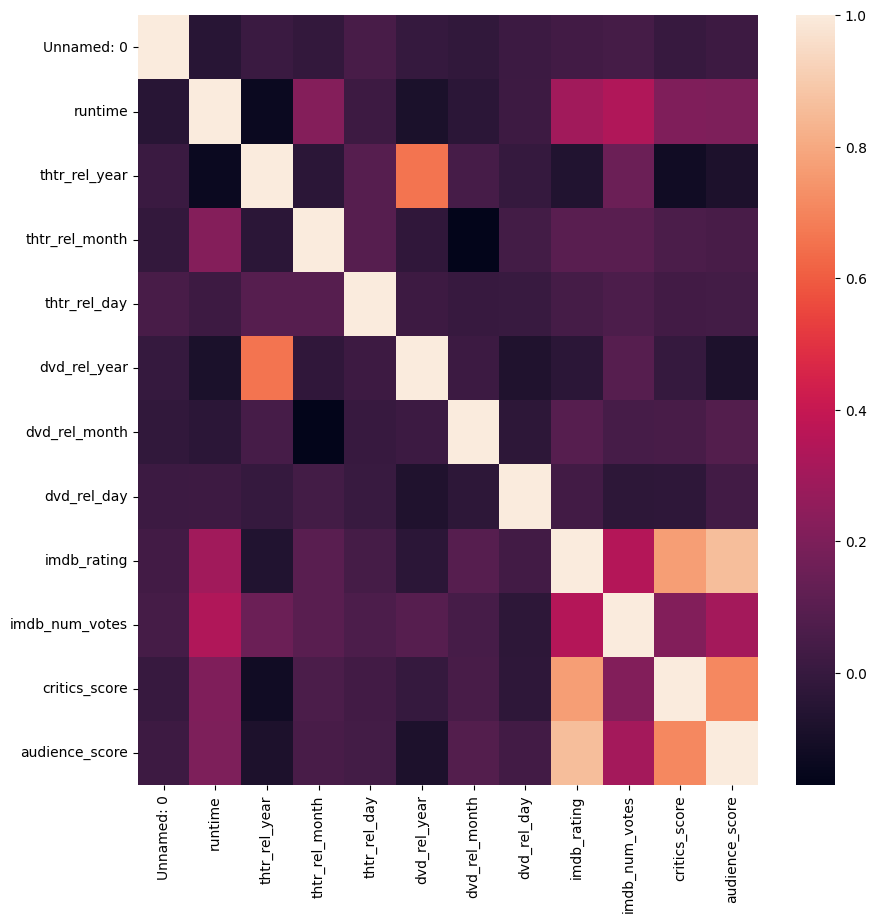

In [37]:
# Slide 10
plt.figure(figsize=(10,10))
# mask = np.zeros_like(movies.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(movies.corr())
# vmin = -1, cmap='coolwarm', annot=True, mask = mask

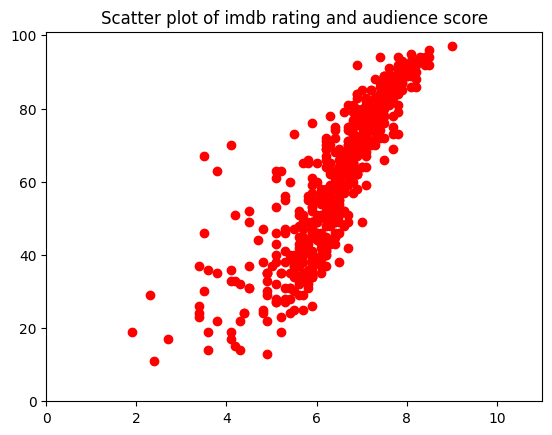

In [38]:
# imdb underscore rating and audience underscore score.
# draw a scatter plot with these two objects by using plot function.
# Scatter plot is a graph in which the values of two variables are plotted along two axes.
# The pattern of the resulting points reveals the correlation.
plt.scatter(movies.imdb_rating, movies.audience_score, c='red')
# plt.scatter(movies.critics_score, movies.audience_score, c='red')
plt.xlim(0,11) # imdb varies from 0 to 10
plt.ylim(0,101) # audience varies from 0 to 100
plt.title('Scatter plot of imdb rating and audience score')
plt.show()
# Concept of correlation is needed here (intuition wise).
# Difference between auto-correlation (do not mix with correlation)

In [46]:
# Range, quartile, information in boxplot
# How to deal with outliers
plt.figure(figsize=(8,10))
movies['diff'] = movies['audience_score'] - movies['critics_score']
chart = sns.boxplot('genre', 'diff', data=movies)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

TypeError: boxplot() got multiple values for argument 'data'

<Figure size 800x1000 with 0 Axes>

# Various distributions

Bernoulli **Distribution**

Tossing a biased coin

(0.0, 1.0)

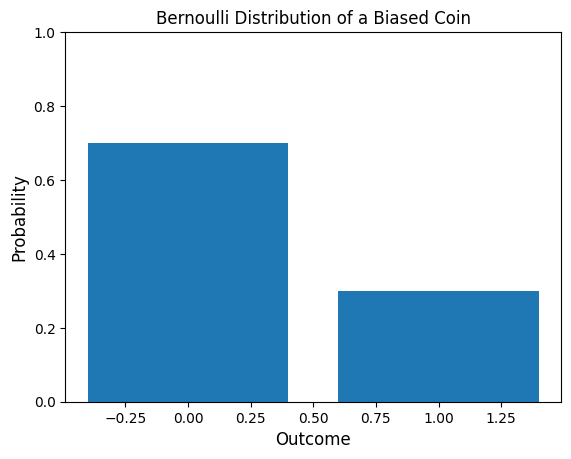

In [40]:
probs = np.array([0.70, 0.3])
side = [0, 1]
plt.bar(side, probs)
plt.title('Bernoulli Distribution of a Biased Coin', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])


# Uniform Distribution

Rolling a dice

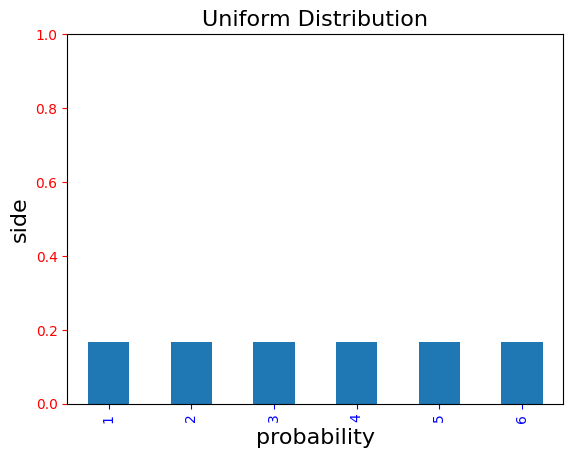

In [41]:
# Skewed pictorial representation
probs = [1/6]*6
side = [1,2,3,4,5,6]
s = pd.Series(probs,side)

#Set descriptions:
plt.title("Uniform Distribution",fontsize=16)
plt.ylabel('side', fontsize=16)
plt.xlabel('probability',fontsize=16)

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
ax.set_ylim([0,1])

#Plot the data:


s.plot(kind = 'bar')

plt.show()

# Binomial Distribution

Tossing a coin certain number of times

Text(0.5, 1.0, 'Binomial Distribution')

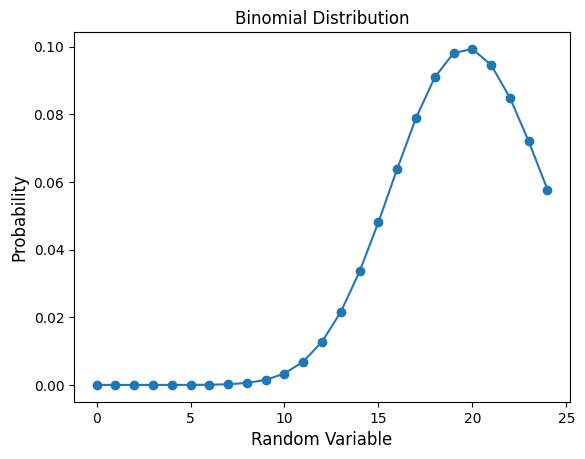

In [42]:
x = np.arange(0, 25)
prob = 0.2
p = 100   # shape parameter
binom = stats.binom.pmf(x,p, prob)
plt.plot(x, binom, '-o')
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Binomial Distribution")

# Gaussian Distribution

Text(0.5, 1.0, 'Normal Distribution')

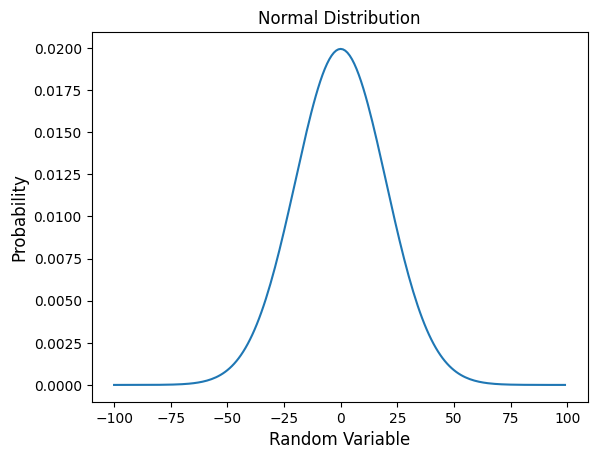

In [43]:
n = np.arange(-100, 100)
mean = 0
normal = stats.norm.pdf(n, mean, 20)
plt.plot(n, normal)
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Normal Distribution")


# Poisson Distribution

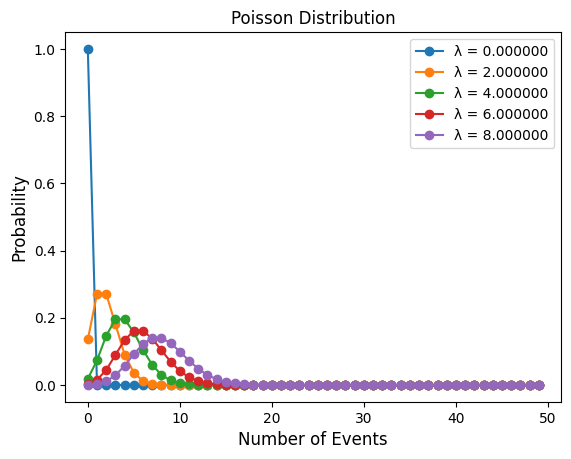

In [44]:
# n = number of events, lambd = expected number of events which can take place in a period
# The Poisson distribution is the discrete probability distribution of the number of events
# occurring in a given time period, given the average number of times the event occurs over that time period.
n = np.arange(0, 50)
for Lambda in range(0,10,2):
    poisson = stats.poisson.pmf(n, Lambda)
    plt.plot(n, poisson, '-o', label="λ = {:f}".format(Lambda))
    plt.xlabel('Number of Events', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution")
    plt.legend()


# Exponential Distribution

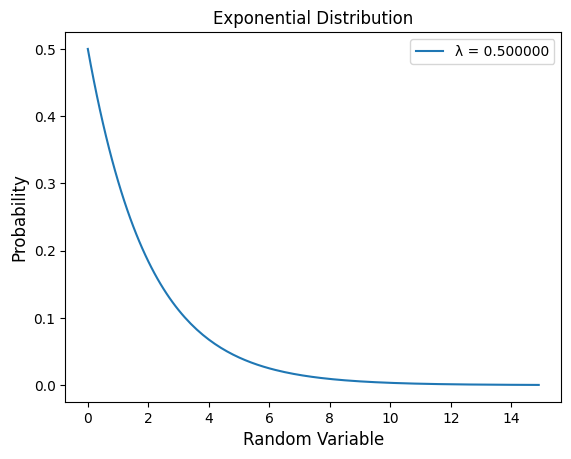

In [45]:
Lambda = 0.5
x = np.arange(0, 15, 0.1)
y = Lambda*np.exp(-Lambda*x)
plt.plot(x,y, label="λ = {:f}".format(Lambda))
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Exponential Distribution")
plt.legend()